# Generating and optimizing over directions

This notebook provides some examples on generating and working with directions 
in our package. 
We provide a conceptual overview on how directions are generated and how one might
go about learning a particular set of directions for a given problem.

In [1]:
import torch 
from torch import nn
from torch_geometric. data import Data, Batch
import matplotlib.pyplot as plt


from dect.directions import generate_uniform_2d_directions
from dect.ect import ECTLayer, ECTConfig


# Set up hardware configurations

DEVICE = "cuda:0"

The direction vectors are always in the format `[ndims,num_thetas]` where
`ndims` is the dimension of the ambient space and `num_thetas` is the number of
directions used. Optionally if one is interested in multiple sets of directions 
we can provide the directions as a vector of size `[num_channels,ndims,num_thetas]`
in which case we will returned a set of images with each channel corresponding to 
an ECT with those directions. An example of that use case is shown at the end 
of this notebook.

In [2]:
# Generate 128 uniformly spaced directions in two dimensions.
num_thetas = 128
v = torch.vstack(
        [
            torch.sin(torch.linspace(0, 2 * torch.pi, num_thetas)),
            torch.cos(torch.linspace(0, 2 * torch.pi, num_thetas)),
        ]
    )

# Output shape
print(v.shape)


torch.Size([2, 128])


Now we wish to compute the ECT of a dataset given this set of directions. 
We initialize the `ECTLayer` with configurations and compute the ECT. 

In [3]:
# Generate some data. We use the same dataset as the previous notebook.

# Basic dataset with three points,three edges and one face.
points_coordinates = torch.tensor([[0.5, 0.0], [-0.5, 0.0], [0.5, 0.5]])

point_cloud = Data(x=points_coordinates)
batch = Batch.from_data_list([point_cloud])

# Initialize the layer
layer = ECTLayer(
    ECTConfig(
        ect_type="points", # The type of ect
        bump_steps=128, # Number of discretization steps
        radius=1.1, # Radius of the ECT 
        normalized=False, # Whether to scale the ECT to the interval [0,1] 
        fixed=True # Learnable or fixed directions.
        ),
    v=v
)

# Compute the ECT
ect = layer(batch)


(-0.5, 127.5, 127.5, -0.5)

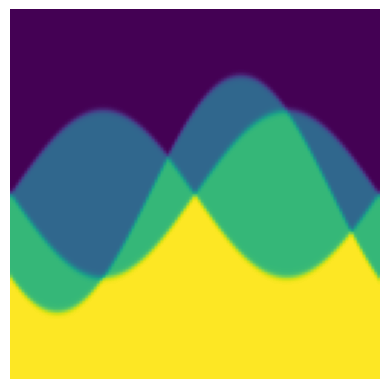

In [6]:
plt.imshow(ect.squeeze().cpu().detach().numpy())
plt.axis("off")

In [7]:
# Now do the same thing for a graph

# Basic dataset with three points,three edges and one face.
points_coordinates = torch.tensor([[0.5, 0.0], [-0.5, 0.0], [0.5, 0.5]])
edge_index=torch.tensor([[0, 1, 2], [1, 2, 0]], dtype=torch.long)

simple_graph = Data(x=points_coordinates,edge_index=edge_index)
batch = Batch.from_data_list([simple_graph])

# Initialize the layer
layer = ECTLayer(
    ECTConfig(
        ect_type="edges", # The type of ect
        bump_steps=128, # Number of discretization steps
        radius=1.1, # Radius of the ECT 
        normalized=False, # Whether to scale the ECT to the interval [0,1] 
        fixed=True # Learnable or fixed directions.
        ),
    v=v
)

# Compute the ECT
ect_graph = layer(batch)



(-0.5, 127.5, 127.5, -0.5)

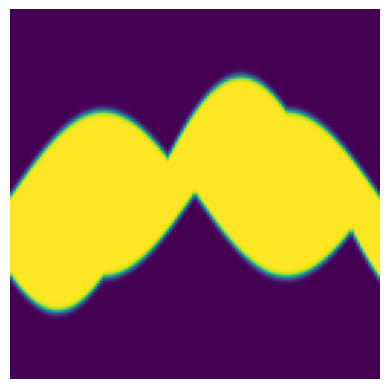

In [8]:
plt.imshow(ect_graph.squeeze().cpu().detach().numpy())
plt.axis("off")

In [5]:
# Now do the same thing for a mesh

# Basic dataset with three points,three edges and one face.
points_coordinates = torch.tensor([[0.5, 0.0], [-0.5, 0.0], [0.5, 0.5]])
edge_index=torch.tensor([[0, 1, 2], [1, 2, 0]], dtype=torch.long)
face_index=torch.tensor([[0], [1], [2]], dtype=torch.long)

simple_mesh = Data(x=points_coordinates,edge_index=edge_index,face=face_index)
batch = Batch.from_data_list([simple_mesh])

# Initialize the layer
layer = ECTLayer(
    ECTConfig(
        ect_type="faces", # The type of ect
        bump_steps=128, # Number of discretization steps
        radius=1.1, # Radius of the ECT 
        normalized=False, # Whether to scale the ECT to the interval [0,1] 
        fixed=True # Learnable or fixed directions.
        ),
    v=v
)

# Compute the ECT
ect_graph = layer(batch)







simple_graph = Data(x=points_coordinates, edge_index=edge_index)
simple_mesh = Data(x=points_coordinates, edge_index=edge_index, face=face_index)